In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

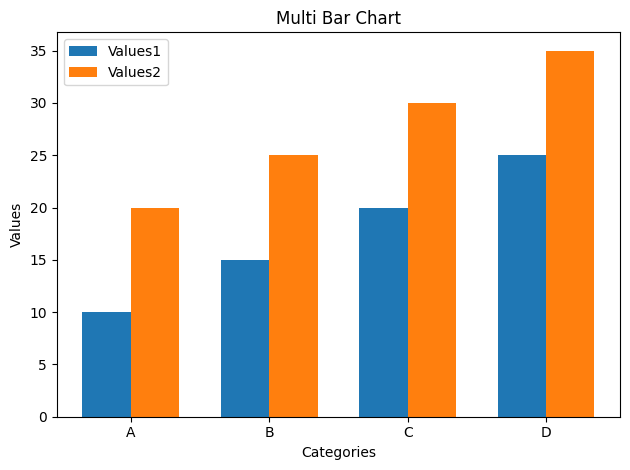

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['A', 'B', 'C', 'D']
values1 = [10, 15, 20, 25]
values2 = [20, 25, 30, 35]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values1, width, label='Values1')
rects2 = ax.bar(x + width/2, values2, width, label='Values2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Multi Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

fig.tight_layout()

plt.show()


In [13]:
import os
import pandas as pd

# Define the folder path
folder_path = './Paciente 1'

# List the files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store the DataFrames
dataframes = []

# Read all CSV files and store their content in the list
for file_name in files:
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dataframes.append(df)


# Display the combined DataFrame
print(dataframes)


[         Veloc     Acele     Des_x     Des_y     Des_z     Presn     VelPr  \
0     0.030399  0.035016  0.007632  0.047844  0.085343  0.547619  0.000000   
1     0.042959  0.005407  0.031493  0.048295  0.036491  0.547619  0.000000   
2     0.030267  0.024484  0.043495  0.018178  0.080085  0.555556  0.043478   
3     0.022043  0.005096  0.018827  0.033053  0.065509  0.563492  0.043478   
4     0.032227  0.018882  0.026096  0.050353  0.023506  0.571429  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1480  0.024062  0.012763  0.023763  0.029181  0.132153  0.142857  0.086957   
1481  0.054667  0.084913  0.047638  0.069833  0.129370  0.126984  0.043478   
1482  0.052131  0.090890  0.037044  0.074210  0.124317  0.119048  0.000000   
1483  0.037042  0.055317  0.032603  0.050053  0.088864  0.119048  0.000000   
1484  0.053508  0.016499  0.061539  0.044109  0.141123  0.119048  0.000000   

         AcePr     F5EEX     F6EES  ...     F19MH     F20MH   

In [12]:
df1=pd.read_csv('11abr.csv')

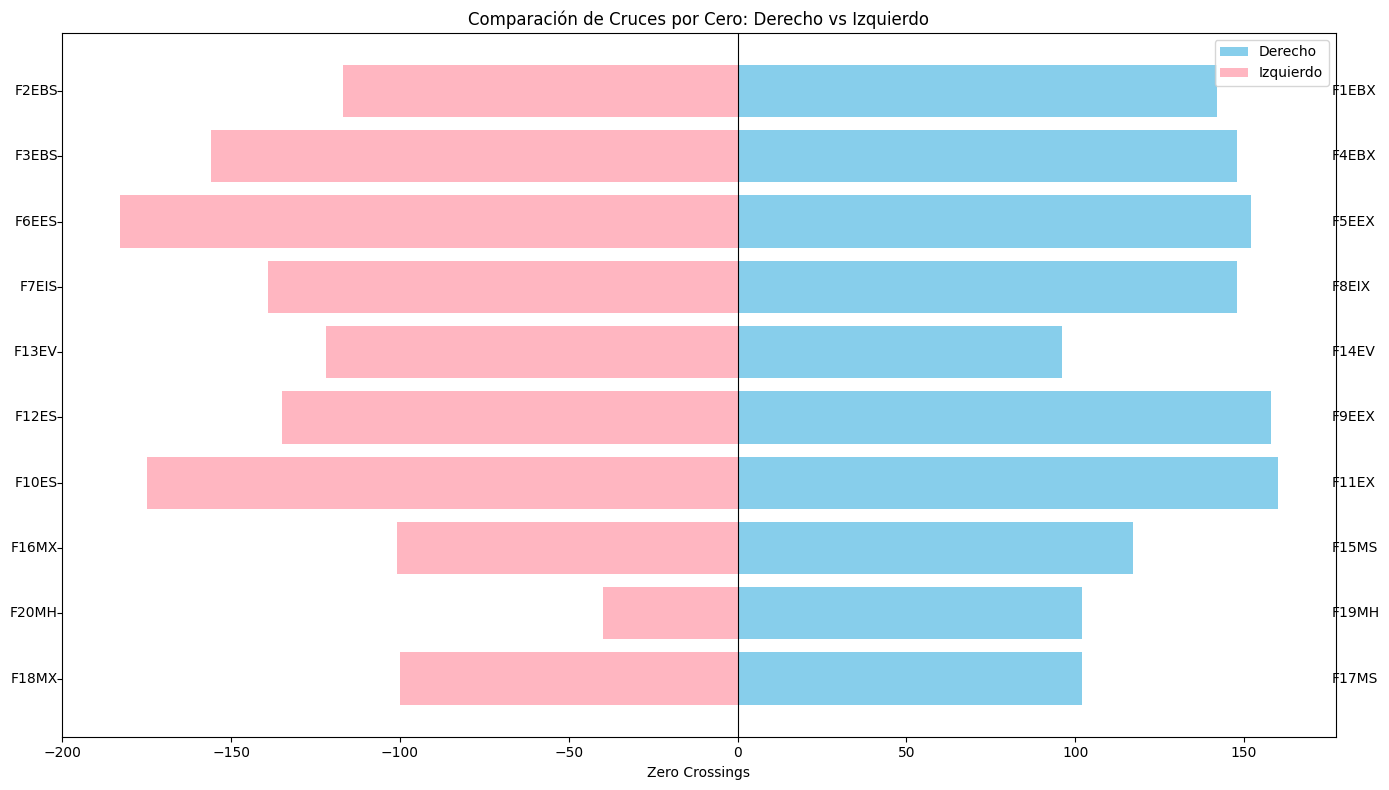

In [ ]:
# Filtros para derecho e izquierdo
derecho = df1[['F1EBX', 'F4EBX', 'F5EEX', 'F8EIX', 'F14EV', 'F9EEX', 'F11EX', 'F15MS', 'F19MH', 'F17MS']]
izquierdo = df1[['F2EBS', 'F3EBS', 'F6EES', 'F7EIS', 'F13EV', 'F12ES', 'F10ES', 'F16MX', 'F20MH', 'F18MX']]

# Estandarización de las columnas numéricas
scaler = StandardScaler()
derecho_normalized = pd.DataFrame(scaler.fit_transform(derecho), columns=derecho.columns)
izquierdo_normalized = pd.DataFrame(scaler.fit_transform(izquierdo), columns=izquierdo.columns)

# Contar cruces por cero para cada columna
cross_zero_counts_derecho = [
    ((derecho_normalized[col].shift(1) * derecho_normalized[col]) < 0).sum()
    for col in derecho_normalized.columns
]

cross_zero_counts_izquierdo = [
    ((izquierdo_normalized[col].shift(1) * izquierdo_normalized[col]) < 0).sum()
    for col in izquierdo_normalized.columns
]

# Crear un DataFrame con los valores de los cruces por cero
df_paired = pd.DataFrame({
    'Columnas_Derecho': derecho.columns,
    'Columnas_Izquierdo': izquierdo.columns,
    'Derecho': cross_zero_counts_derecho,
    'Izquierdo': cross_zero_counts_izquierdo
})

# Agregar una fila para las sumatorias totales utilizando pd.concat()
sumatoria_derecho = sum(df_paired['Derecho'])
sumatoria_izquierdo = sum(df_paired['Izquierdo'])
df_sumatoria = pd.DataFrame({
    'Columnas_Derecho': ['Sumatoria Total'],
    'Columnas_Izquierdo': ['Sumatoria Total'],
    'Derecho': [sumatoria_derecho],
    'Izquierdo': [sumatoria_izquierdo]
})
df_paired = pd.concat([df_paired], ignore_index=True)

# Crear la gráfica de pirámide
fig, ax = plt.subplots(figsize=(14, 8))

# Posiciones en el eje y (una posición por cada par de columnas más la fila de sumatorias)
y_positions = range(len(df_paired))

# Dibujar las barras horizontales para cada par de columnas y la sumatoria
ax.barh(y_positions, df_paired['Derecho'], color='skyblue', label='Derecho', align='center')
ax.barh(y_positions, -df_paired['Izquierdo'], color='lightpink', label='Izquierdo', align='center')  # Negativo para enfrentar

# Configuración del eje y con etiquetas a ambos lados
ax.set_yticks(y_positions)
ax.set_yticklabels([''] * len(df_paired))  # Ocultamos temporalmente las etiquetas centrales
ax.invert_yaxis()  # Para que las barras más grandes queden en la parte superior

# Etiquetas a la izquierda y derecha de las barras
for i, (col_derecho, col_izquierdo) in enumerate(zip(df_paired['Columnas_Derecho'], df_paired['Columnas_Izquierdo'])):
    ax.text(-max(df_paired['Izquierdo']) * 1.1, i, col_izquierdo, ha='right', va='center', fontsize=10, color='black')  # Etiquetas de izquierdo
    ax.text(max(df_paired['Derecho']) * 1.1, i, col_derecho, ha='left', va='center', fontsize=10, color='black')  # Etiquetas de derecho

# Configuración de etiquetas y leyenda
ax.set_xlabel('Zero Crossings')
ax.set_title('Comparación de Cruces por Cero: Derecho vs Izquierdo')
ax.legend(loc='upper right')

# Línea central para separar los lados
ax.axvline(0, color='black', linewidth=0.8)

# Ajustar diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

In [7]:
# Función para calcular cruces por cero
def calculate_zero_crossings(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
    zero_crossings = {
        col: ((df_normalized[col].shift(1) * df_normalized[col]) < 0).sum()
        for col in df_normalized.columns
    }
    return pd.DataFrame(list(zero_crossings.items()), columns=['Column', 'Zero_Crossings'])

# Crear un radar chart para múltiples sesiones
def create_combined_radar_chart(radar_data, labels, title):
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Construir ángulos para las variables (mismas para todos los DataFrames)
    categories = radar_data[0]['Column']
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el radar

    # Dibujar cada serie de datos en el radar
    for session_data, label in zip(radar_data, labels):
        values = session_data['Zero_Crossings'].tolist()
        values += values[:1]  # Cerrar el gráfico
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=label)
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_ylim(0, max(max(df['Zero_Crossings']) for df in radar_data))
    ax.set_title(title, size=15, color='white', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    return fig

# Simular DataFrames df1, df2, df3, df4
# En tu caso, carga los datos reales aquí
np.random.seed(42)
time_data = np.linspace(0, 50, 500)
df1 = pd.DataFrame({
    'Tiempo': time_data,
    'Var1': np.sin(time_data) + np.random.normal(0, 0.1, len(time_data)),
    'Var2': np.cos(time_data) + np.random.normal(0, 0.1, len(time_data)),
    'Var3': np.random.normal(0, 1, len(time_data))
})

df2 = df1.copy()
df3 = df1.copy()
df4 = df1.copy()

# Calcular cruces por cero para cada sesión
radar_data = [calculate_zero_crossings(df) for df in [df1, df2, df3, df4]]


with tab1:
    col1, col2, col3 = st.columns([2, 2, 2])

    # Crear gráfico combinado de radar para las 4 sesiones
    with col3:        
        combined_radar_chart = create_combined_radar_chart(
            radar_data, 
            labels=["Sesión 1", "Sesión 2", "Sesión 3", "Sesión 4"],
            title="Cruces por Cero - Comparación"
        )
        st.pyplot(combined_radar_chart)

NameError: name 'tab1' is not defined

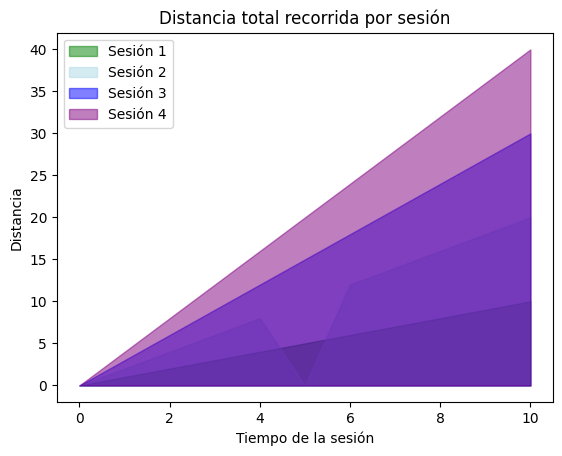

In [4]:
import matplotlib.pyplot as plt

# Datos
tiempo = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sesion1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sesion2 = [0, 2, 4, 6, 8, 0, 12, 14, 16, 18, 20]
sesion3 = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
sesion4 = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]

# Crear el gráfico de áreas
plt.fill_between(tiempo, sesion1, color='green', alpha=0.5, label='Sesión 1')
plt.fill_between(tiempo, sesion2, color='lightblue', alpha=0.5, label='Sesión 2')
plt.fill_between(tiempo, sesion3, color='blue', alpha=0.5, label='Sesión 3')
plt.fill_between(tiempo, sesion4, color='purple', alpha=0.5, label='Sesión 4')

# Etiquetas y título
plt.xlabel('Tiempo de la sesión')
plt.ylabel('Distancia')
plt.title('Distancia total recorrida por sesión')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()
